In [5]:
import pandas as pd
import matplotlib.pylab as pl
import numpy as np

import os
import geopandas as gpd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
DATA = '../data'

In [7]:
yelp = pd.read_csv(DATA + '/yelp_counts_per_ct.csv', index_col=0)
yelp.head()

,FIPS,Total,asian,european,halal,hispanic,midmed,Armenian,Cambodian,Caribbean,...,Puerto Rican,Russian,Salvadoran,Shanghainese,Singaporean,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese
0,36005000200,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36005001900,5.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,36005002000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36005002500,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36005002701,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
for file in os.listdir(DATA + '/2010CensusTract'):
    if 'shp' in file:
        ct_2010 = gpd.read_file(DATA + '/2010CensusTract/' + file)

print(ct_2010.crs)
ct_2010.head()

{'init': 'epsg:4326'}


,puma,boro_ct201,ct2010,ntaname,ntacode,boro_name,shape_leng,shape_area,cdeligibil,boro_code,ctlabel,geometry
0,3903,5000900,000900,West New Brighton-New Brighton-St. George,SI22,Staten Island,7729.016794,2.497010e+06,I,5,9,POLYGON ((-74.07920577013245 40.64343078374567...
1,3808,1009800,009800,Turtle Bay-East Midtown,MN19,Manhattan,5534.199811,1.906016e+06,I,1,98,POLYGON ((-73.96432543478758 40.75638153099091...
2,3808,1010000,010000,Turtle Bay-East Midtown,MN19,Manhattan,5692.168737,1.860938e+06,I,1,100,POLYGON ((-73.96802436915851 40.75957814005282...
3,3807,1010200,010200,Midtown-Midtown South,MN17,Manhattan,5687.802439,1.860993e+06,I,1,102,POLYGON ((-73.97124277307127 40.76093641847906...
4,3807,1010400,010400,Midtown-Midtown South,MN17,Manhattan,5693.036367,1.864600e+06,I,1,104,POLYGON ((-73.97445730550224 40.76229308352487...


In [9]:
boro_county = {
    'Bronx': '005',
    'Brooklyn': '047',
    'Manhattan': '061',
    'Queens': '081',
    'Staten Island': '085'
}

In [10]:
ct_2010['County'] = ct_2010['boro_name'].map(boro_county)
ct_2010['FIPS'] =  '36' + ct_2010['County'] + ct_2010['ct2010']
ct_2010['FIPS'] = pd.to_numeric(ct_2010['FIPS'])

In [12]:
yelp_cluster.head()

,FIPS,geometry,Total,asian,european,halal,hispanic,midmed,Armenian,Cambodian,...,Puerto Rican,Russian,Salvadoran,Shanghainese,Singaporean,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese
0,36085000900,POLYGON ((-74.07920577013245 40.64343078374567...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36061009800,POLYGON ((-73.96432543478758 40.75638153099091...,80.0,32.0,25.0,1.0,13.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,0.0,1.0
2,36061010000,POLYGON ((-73.96802436915851 40.75957814005282...,38.0,17.0,11.0,2.0,2.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,36061010200,POLYGON ((-73.97124277307127 40.76093641847906...,23.0,4.0,11.0,1.0,2.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,36061010400,POLYGON ((-73.97445730550224 40.76229308352487...,49.0,20.0,18.0,0.0,4.0,7.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [26]:
yelp_cluster = ct_2010[['FIPS','geometry']].merge(yelp, on='FIPS').reset_index(drop=True)

In [27]:
yelp_cluster.head()

,FIPS,geometry,Total,asian,european,halal,hispanic,midmed,Armenian,Cambodian,...,Puerto Rican,Russian,Salvadoran,Shanghainese,Singaporean,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese
0,36085000900,POLYGON ((-74.07920577013245 40.64343078374567...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36061009800,POLYGON ((-73.96432543478758 40.75638153099091...,80.0,32.0,25.0,1.0,13.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,0.0,1.0
2,36061010000,POLYGON ((-73.96802436915851 40.75957814005282...,38.0,17.0,11.0,2.0,2.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,36061010200,POLYGON ((-73.97124277307127 40.76093641847906...,23.0,4.0,11.0,1.0,2.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,36061010400,POLYGON ((-73.97445730550224 40.76229308352487...,49.0,20.0,18.0,0.0,4.0,7.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [28]:
yelp_cluster.to_file('YelpFIPS.shp')

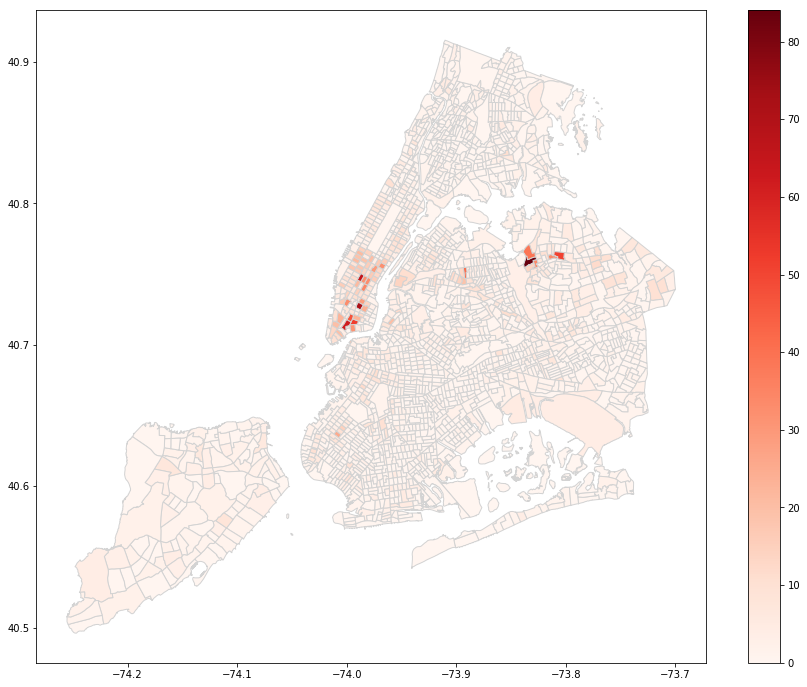

In [17]:
fig = pl.figure(figsize=(15,12))
ax = fig.add_subplot(111)

yelp_cluster.plot(ax=ax, column='asian', cmap='Reds', legend=True, edgecolor='lightgray')

In [29]:
import pysal as ps

In [30]:
qw_yelp=ps.queen_from_shapefile('YelpFIPS.shp')

/Users/unissechua/devel/PUI2017/venv/lib/python3.6/site-packages/pysal/weights/weights.py:189: UserWarning: There are 3 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
/Users/unissechua/devel/PUI2017/venv/lib/python3.6/site-packages/pysal/weights/weights.py:190: UserWarning: Island ids: 634, 837, 1755
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


In [36]:
qw_yelp.transform = 'r'

('WARNING: ', 634, ' is an island (no neighbors)')
('WARNING: ', 837, ' is an island (no neighbors)')
('WARNING: ', 1755, ' is an island (no neighbors)')


In [63]:
columns = yelp_cluster.columns
categories = list(columns[2:])
categories

['Total',
 'asian',
 'european',
 'halal',
 'hispanic',
 'midmed',
 'Armenian',
 'Cambodian',
 'Caribbean',
 'Chinese',
 'Colombian',
 'Cuban',
 'Dominican',
 'Filipino',
 'French',
 'German',
 'Greek',
 'Haitian',
 'Halal',
 'Himalayan Nepalese',
 'Indian',
 'Irish',
 'Italian',
 'Japanese',
 'Jewish',
 'Korean',
 'Kosher',
 'Latin American',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Moroccan',
 'Pakistani',
 'Peruvian',
 'Polish',
 'Puerto Rican',
 'Russian',
 'Salvadoran',
 'Shanghainese',
 'Singaporean',
 'Taiwanese',
 'Thai',
 'Turkish',
 'Venezuelan',
 'Vietnamese']

In [86]:
for i in categories:
    values = yelp_cluster[i]
    lag = ps.lag_spatial(qw_yelp, values)
    
    lag5 = ps.Natural_Breaks(lag, k=5)
    yelp_cluster[i] = lag5.yb

In [87]:
yelp_cluster.head()

,FIPS,geometry,Total,asian,european,halal,hispanic,midmed,Armenian,Cambodian,...,Puerto Rican,Russian,Salvadoran,Shanghainese,Singaporean,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese
0,36085000900,POLYGON ((-74.07920577013245 40.64343078374567...,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,36061009800,POLYGON ((-73.96432543478758 40.75638153099091...,4,4,4,3,3,4,0,0,...,1,0,0,1,0,1,3,2,1,1
2,36061010000,POLYGON ((-73.96802436915851 40.75957814005282...,4,4,4,2,4,4,0,0,...,1,0,0,1,0,0,4,3,1,2
3,36061010200,POLYGON ((-73.97124277307127 40.76093641847906...,4,4,4,4,4,4,0,0,...,1,0,0,2,0,1,3,2,1,1
4,36061010400,POLYGON ((-73.97445730550224 40.76229308352487...,4,4,4,3,4,3,0,0,...,0,2,0,1,0,0,3,2,1,1


In [88]:
yelp_cluster.to_file('Yelp_Weights.shp')

In [89]:
yelp_cluster.to_csv('../data/Yelp_Weights.csv')

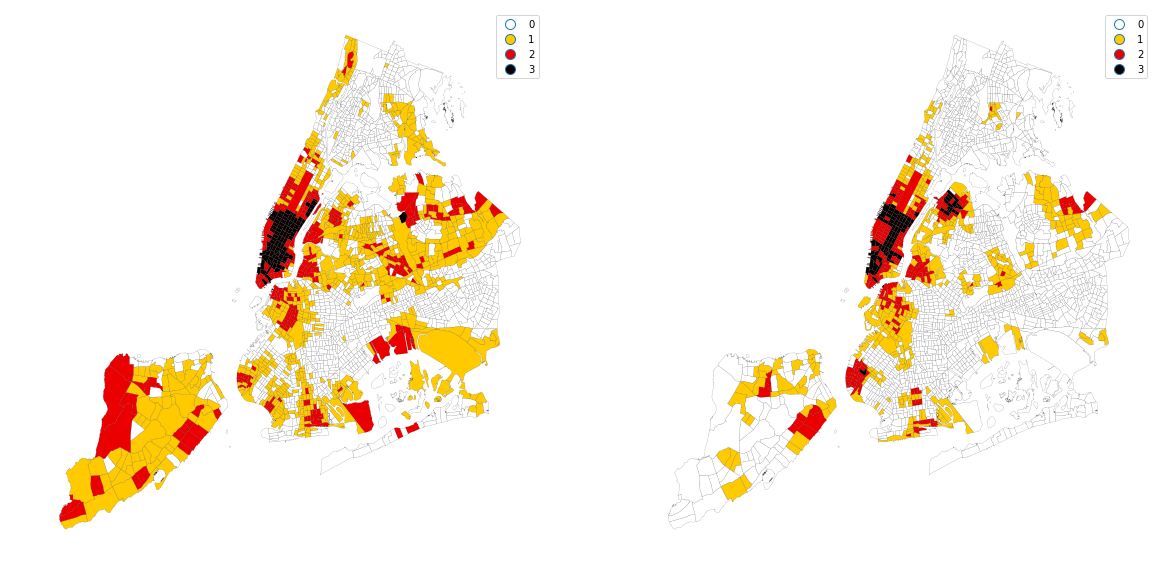

In [79]:
fig = pl.figure(figsize=(20,10))
ax = fig.add_subplot(121)
yelp_cluster.plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='black', legend=True)
ax.set_axis_off();
# plt.title("Monthly Ride Spatial Lag Deciles")

ax2 = fig.add_subplot(122)
yelp_cluster.assign(cl=MidMedLag10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax2, 
        edgecolor='black', legend=True)
ax2.set_axis_off();